In [2]:
import pandas as pd

In [10]:
# Note this dataset need to clear first row since its all year ending string
crime_df = pd.read_csv("/root/project-2-group-real-estate-industry-project-34/data/landing/CI_LGAb.csv", encoding='utf-16', delimiter='\t')

In [11]:
crime_df.columns

Index(['Police Region', 'Local Government Area', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [12]:
# Remove rows where 'Local Government Area' is equal to 'Total'
crime_df = crime_df[crime_df['Local Government Area'].str.lower() != 'total']
crime_df = crime_df[crime_df['Local Government Area'] != ' Unincorporated Vic']
crime_df = crime_df[crime_df['Local Government Area'] != ' Justice Institutions and Immigration Facilities']

In [13]:
from utilities import find_location_id, get_coordinates

In [14]:
# Apply the get_coordinates function to the 'Address' column and create new Latitude and Longitude columns
crime_df['Latitude'] = crime_df['Local Government Area'].apply(lambda address: get_coordinates(address)[0])
crime_df['Longitude'] = crime_df['Local Government Area'].apply(lambda address: get_coordinates(address)[1])

In [15]:
# Print rows where 'Latitude' or 'Longitude' is empty
missing_lat_lon = crime_df[(crime_df['Latitude'].isna()) | (crime_df['Longitude'].isna())]

# Display the rows with missing latitude or longitude
print(missing_lat_lon)


         Police Region Local Government Area     2015     2016     2017  \
12  1 North West Metro               Wyndham  4,681.1  5,263.3  4,953.4   
15           2 Eastern                Alpine  2,405.7  2,607.7  2,207.0   
22           2 Eastern                Indigo  1,978.4  2,369.3  2,135.4   
28           2 Eastern              Mitchell  5,444.1  7,132.4  7,294.7   
29           2 Eastern                 Moira  3,680.7  4,032.4  4,627.0   
64           4 Western               Hepburn  3,260.7  3,942.0  4,602.8   

       2018     2019     2020     2021     2022     2023     2024  Latitude  \
12  4,225.9  4,195.4  4,828.2  4,283.2  3,890.1  4,255.6  4,292.9       NaN   
15  2,487.9  3,092.1  3,355.3  3,038.1  2,797.4  2,624.8  2,501.4       NaN   
22  2,040.6  2,198.4  2,512.4  2,469.4  2,645.6  3,085.7  2,606.0       NaN   
28  6,825.1  6,540.4  6,490.1  6,360.6  4,529.6  4,757.7  5,371.0       NaN   
29  5,028.4  5,588.2  6,049.9  5,361.1  5,123.6  5,134.0  5,631.0       NaN   


In [16]:
# Create a dictionary of areas with their respective latitude and longitude
# Obtained from online sources (wikipedia, mapcarta)
coordinates = {
    ' Wyndham': (-37.8928, 144.6357),
    ' Alpine': (-36.7322, 147.8176),
    ' Indigo': (-36.3500, 146.6833),
    ' Mitchell': (-37.0833, 144.7167),
    ' Moira': (-36.0496, 145.6826),
    ' Hepburn': (-37.3800, 144.1458)
}

# Loop through each area and update latitude and longitude in the DataFrame
for area, (lat, lon) in coordinates.items():
    crime_df.loc[crime_df['Local Government Area'] == area, 'Latitude'] = lat
    crime_df.loc[crime_df['Local Government Area'] == area, 'Longitude'] = lon

# Display the updated rows with latitude and longitude
print(crime_df[crime_df['Local Government Area'].isin(coordinates.keys())])


         Police Region Local Government Area     2015     2016     2017  \
12  1 North West Metro               Wyndham  4,681.1  5,263.3  4,953.4   
15           2 Eastern                Alpine  2,405.7  2,607.7  2,207.0   
22           2 Eastern                Indigo  1,978.4  2,369.3  2,135.4   
28           2 Eastern              Mitchell  5,444.1  7,132.4  7,294.7   
29           2 Eastern                 Moira  3,680.7  4,032.4  4,627.0   
64           4 Western               Hepburn  3,260.7  3,942.0  4,602.8   

       2018     2019     2020     2021     2022     2023     2024  Latitude  \
12  4,225.9  4,195.4  4,828.2  4,283.2  3,890.1  4,255.6  4,292.9  -37.8928   
15  2,487.9  3,092.1  3,355.3  3,038.1  2,797.4  2,624.8  2,501.4  -36.7322   
22  2,040.6  2,198.4  2,512.4  2,469.4  2,645.6  3,085.7  2,606.0  -36.3500   
28  6,825.1  6,540.4  6,490.1  6,360.6  4,529.6  4,757.7  5,371.0  -37.0833   
29  5,028.4  5,588.2  6,049.9  5,361.1  5,123.6  5,134.0  5,631.0  -36.0496   


In [17]:
import geopandas as gpd
sf = gpd.read_file("/root/MAST30034_Python/data/vic_zones/SA2_2021_AUST_GDA2020.shp")


In [18]:
# Apply the 'find_location_id' function to each row in 'rent_data'
crime_df['SA2_CODE21'] = crime_df.apply(
    lambda row: find_location_id(row['Latitude'], row['Longitude'], sf), axis=1
)

In [19]:
crime_df.head()

,Police Region,Local Government Area,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Latitude,Longitude,SA2_CODE21
0,1 North West Metro,Banyule,"5,216.2","5,667.5","5,788.1","5,681.7","5,364.2","5,573.5","4,934.4","4,102.7","4,262.3","4,633.9",-37.731425,145.082419,209011203
1,1 North West Metro,Brimbank,"6,837.1","7,330.4","7,117.4","6,546.1","7,090.0","7,580.3","7,379.3","6,350.8","6,338.3","6,762.3",-37.759479,144.807137,213011335
2,1 North West Metro,Darebin,"7,088.1","7,666.0","8,432.5","7,272.3","7,148.2","7,573.1","7,634.3","6,141.2","6,210.7","6,848.3",-37.727768,145.016269,209021525
3,1 North West Metro,Hobsons Bay,"5,861.0","5,930.8","5,528.7","5,076.2","5,057.5","5,153.7","4,830.5","4,992.2","4,927.6","4,910.0",-37.836080,144.840123,213021343
4,1 North West Metro,Hume,"6,804.6","7,532.8","7,876.1","6,768.6","6,624.5","6,522.7","6,266.8","4,793.8","4,932.9","5,188.7",-37.598691,144.829126,210051246


In [20]:
crime_df.to_csv("crime_data_with_SA2.csv",header=True,index=False)

In [21]:
crime_df = pd.read_csv("/root/project-2-group-real-estate-industry-project-34/notebooks/crime_data_with_SA2.csv")

In [22]:
crime_df.head()

,Police Region,Local Government Area,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Latitude,Longitude,SA2_CODE21
0,1 North West Metro,Banyule,"5,216.2","5,667.5","5,788.1","5,681.7","5,364.2","5,573.5","4,934.4","4,102.7","4,262.3","4,633.9",-37.731425,145.082419,209011203.0
1,1 North West Metro,Brimbank,"6,837.1","7,330.4","7,117.4","6,546.1","7,090.0","7,580.3","7,379.3","6,350.8","6,338.3","6,762.3",-37.759479,144.807137,213011335.0
2,1 North West Metro,Darebin,"7,088.1","7,666.0","8,432.5","7,272.3","7,148.2","7,573.1","7,634.3","6,141.2","6,210.7","6,848.3",-37.727768,145.016269,209021525.0
3,1 North West Metro,Hobsons Bay,"5,861.0","5,930.8","5,528.7","5,076.2","5,057.5","5,153.7","4,830.5","4,992.2","4,927.6","4,910.0",-37.836080,144.840123,213021343.0
4,1 North West Metro,Hume,"6,804.6","7,532.8","7,876.1","6,768.6","6,624.5","6,522.7","6,266.8","4,793.8","4,932.9","5,188.7",-37.598691,144.829126,210051246.0


In [24]:
# List of the year columns in the dataset
year_columns = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Remove commas and convert to float for each year column
for year in year_columns:
    crime_df[year] = crime_df[year].str.replace(',', '').astype(float)
    
# Group by SA2_CODE21 and calculate the mean for each year
mean_crime_rate_by_sa2 = crime_df.groupby('SA2_CODE21')[year_columns].mean()

In [28]:
mean_crime_rate_by_sa2

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
SA2_CODE21,,,,,,,,,,
201011002.0,7711.0,8728.5,8730.4,8269.8,7405.3,7801.5,6332.8,6524.4,6962.3,7761.1
201021009.0,4778.3,5099.2,5880.3,5259.4,4562.3,4439.2,5249.3,4072.6,3993.1,4574.9
201021011.0,3260.7,3942.0,4602.8,4018.4,3843.5,4516.8,3075.5,2630.8,3059.4,3303.8
201031017.0,6239.4,6961.1,7189.4,6804.2,6869.4,6509.3,6124.9,6065.1,5702.1,6936.2
202011024.0,5539.2,5913.6,7029.3,6101.4,6845.2,6938.3,6591.8,6092.7,6327.4,6573.9
...,...,...,...,...,...,...,...,...,...,...
217031474.0,2734.4,3466.1,4920.4,3819.9,3030.1,3402.0,4254.5,3625.2,3016.1,3707.0
217041477.0,2700.3,2551.2,2908.4,2746.0,2694.6,2960.6,2937.1,3112.5,2470.2,2738.1
217041479.0,5905.0,6445.3,7497.1,7773.6,8566.0,6965.4,6206.1,6175.5,5867.9,6428.2


In [30]:
mean_crime_rate_by_sa2.head(5)

,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,average_crime_rate,average_crime_rate_growth
SA2_CODE21,,,,,,,,,,,,
201011002.0,7711.0,8728.5,8730.4,8269.8,7405.3,7801.5,6332.8,6524.4,6962.3,7761.1,7622.71,0.580279
201021009.0,4778.3,5099.2,5880.3,5259.4,4562.3,4439.2,5249.3,4072.6,3993.1,4574.9,4790.86,0.441427
201021011.0,3260.7,3942.0,4602.8,4018.4,3843.5,4516.8,3075.5,2630.8,3059.4,3303.8,3625.37,1.781896
201031017.0,6239.4,6961.1,7189.4,6804.2,6869.4,6509.3,6124.9,6065.1,5702.1,6936.2,6540.11,1.553425
202011024.0,5539.2,5913.6,7029.3,6101.4,6845.2,6938.3,6591.8,6092.7,6327.4,6573.9,6395.28,2.350933


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# List of the years we're using for prediction
crime_years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']

# Prepare the data: Create features using past three years and year as an ordinal feature
def create_features(df, crime_years):
    features = []
    for i in range(3, len(crime_years)):
        df_temp = df[[crime_years[i-3], crime_years[i-2], crime_years[i-1]]].copy()
        df_temp.columns = ['year_minus_3', 'year_minus_2', 'year_minus_1']
        df_temp['year'] = int(crime_years[i])  # Adding year as ordinal
        df_temp['target'] = df[crime_years[i]]  # The current year to predict
        features.append(df_temp)
    return pd.concat(features)

# Create feature set for training from 2018 to 2024
features_df = create_features(mean_crime_rate_by_sa2, crime_years)

# Define features (X) and target (y)
X = features_df[['year_minus_3', 'year_minus_2', 'year_minus_1', 'year']]
y = features_df['target']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict crime rates for 2025 to 2027 using data from 2022 to 2024
X_pred_2025 = mean_crime_rate_by_sa2[['2022', '2023', '2024']].copy()
X_pred_2025.columns = ['year_minus_3', 'year_minus_2', 'year_minus_1']
X_pred_2025['year'] = 2025

X_pred_2026 = mean_crime_rate_by_sa2[['2023', '2024', '2025']].copy()
X_pred_2026.columns = ['year_minus_3', 'year_minus_2', 'year_minus_1']
X_pred_2026['year'] = 2026

X_pred_2027 = mean_crime_rate_by_sa2[['2024', '2025', '2026']].copy()
X_pred_2027.columns = ['year_minus_3', 'year_minus_2', 'year_minus_1']
X_pred_2027['year'] = 2027

# Predict the crime rates
predicted_2025 = rf_model.predict(X_pred_2025)
predicted_2026 = rf_model.predict(X_pred_2026)
predicted_2027 = rf_model.predict(X_pred_2027)

# Add predictions to the dataframe
mean_crime_rate_by_sa2['2025'] = predicted_2025
mean_crime_rate_by_sa2['2026'] = predicted_2026
mean_crime_rate_by_sa2['2027'] = predicted_2027

# Display the updated dataframe with predictions
print(mean_crime_rate_by_sa2[['2025', '2026', '2027']].head())


Mean Squared Error: 394082.9428553198
                 2025      2026      2027
SA2_CODE21                               
201011002.0  7438.391  7060.249  7621.696
201021009.0  4077.237  4024.362  4160.167
201021011.0  2833.143  2748.010  2690.044
201031017.0  6878.219  6690.978  7049.720
202011024.0  6985.661  6861.071  7014.034


In [38]:
mean_crime_rate_by_sa2.to_parquet("grouped_crime_data_with_predictions.parquet", index=False)


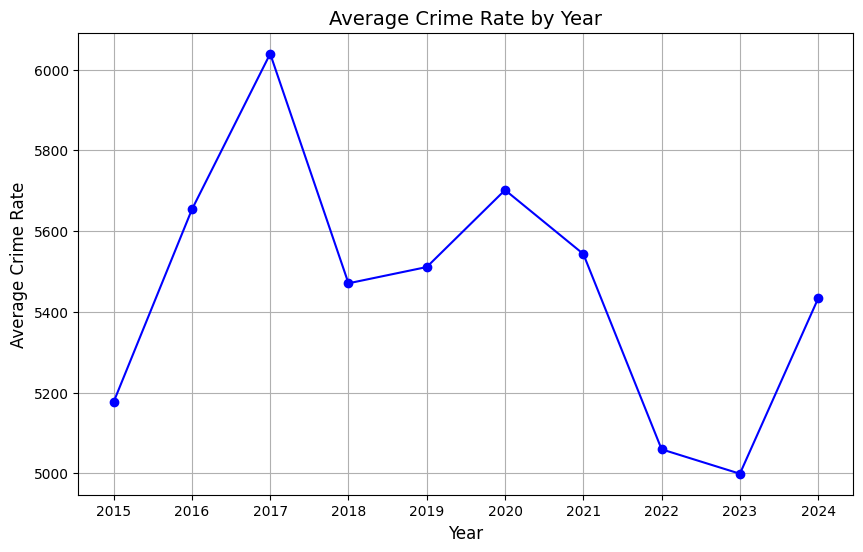

In [35]:
import matplotlib.pyplot as plt

# Calculate the average crime rate by year
crime_years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
average_crime_rate_by_year = mean_crime_rate_by_sa2[crime_years].mean()

# Plot the average crime rate by year
plt.figure(figsize=(10, 6))
plt.plot(crime_years, average_crime_rate_by_year, marker='o', color='b')
plt.title('Average Crime Rate by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Crime Rate', fontsize=12)
plt.grid(True)
plt.show()
